# Algoritmos de optimización - Seminario<br>
Nombre y Apellidos:   <br>
Url: https://github.com/.../03MAIR---Algoritmos-de-Optimizacion---2019/tree/master/SEMINARIO<br>
Problema:
> 1. Sesiones de doblaje <br>
>2. Organizar los horarios de partidos de La Liga<br>
>3. Combinar cifras y operaciones

Descripción del problema:

Problema 1. Organizar sesiones de doblaje(I)
• Se precisa coordinar el doblaje de una película. Los actores del doblaje deben coincidir en las
tomas en las que sus personajes aparecen juntos en las diferentes tomas. Los actores de
doblaje cobran toda la misma cantidad por cada día que deben desplazarse hasta el estudio de
grabación independientemente del número de tomas que se graben. No es posible grabar más
de 6 tomas por día. El objetivo es planificar las sesiones por día de manera que el gasto por los
servicios de los actores de doblaje sea el menor posible. Los datos son:
Número de actores: 10
Número de tomas : 30
Actores/Tomas : https://bit.ly/36D8IuK
- 1 indica que el actor participa en la toma
- 0 en caso contrario



....

(*) La respuesta es obligatoria





                                        

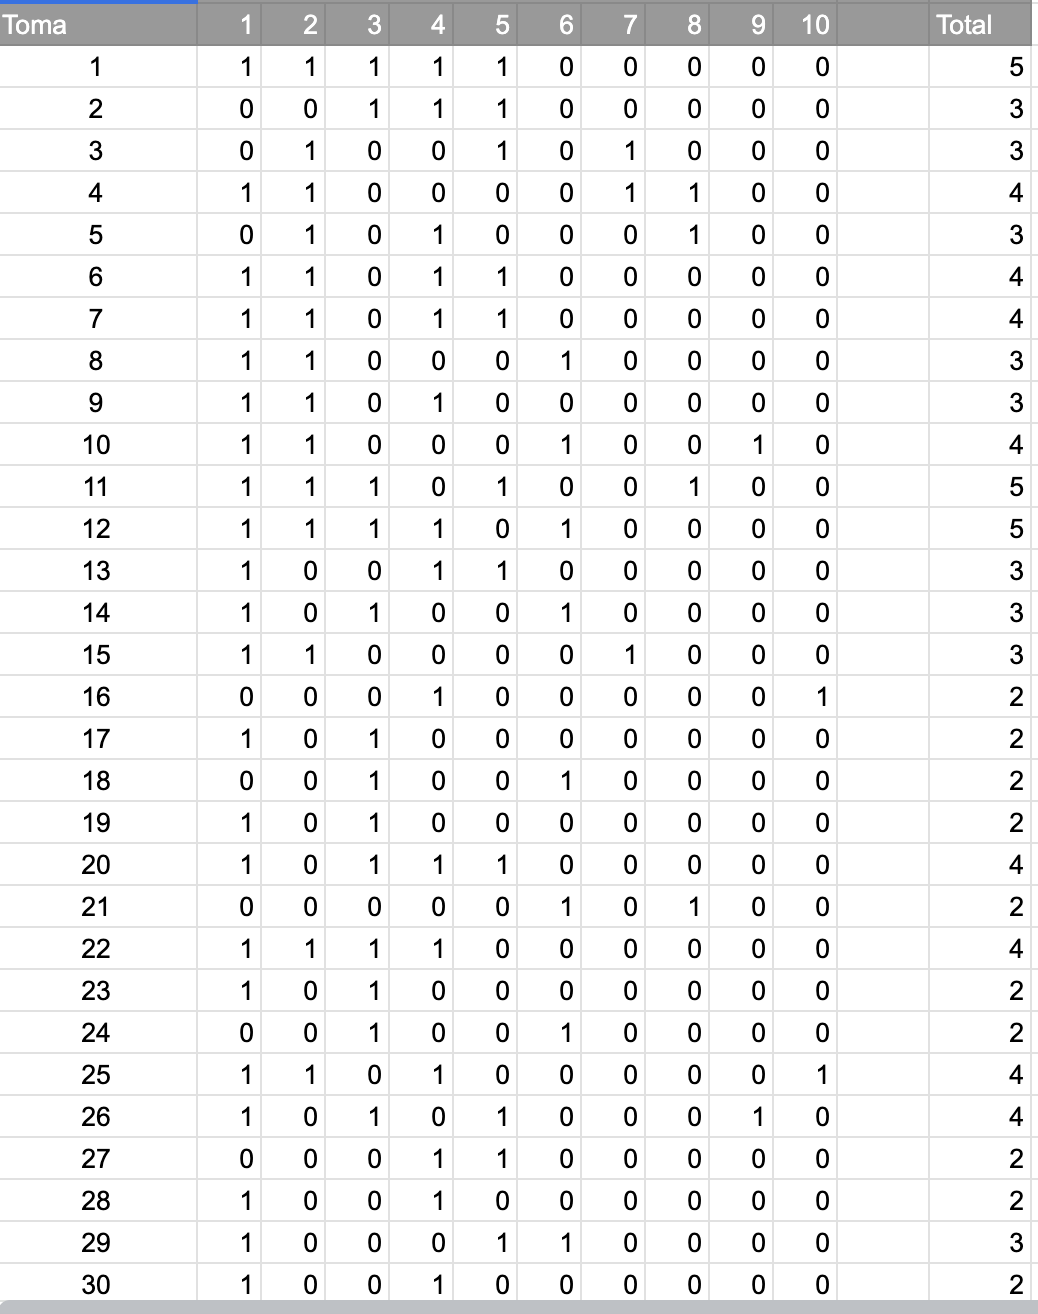

In [5]:
import numpy as np
"""
    En este problema se nos pide organizar las tomas de una película de tal manera que se minimice el número de días de grabación.
	1.	Ordeno las tomas en orden creciente.
	2.	Recorro las tomas en orden y las asigno al primer día disponible donde ningún actor ya ocupado en el día aparezca en la toma.
	3.	Si la toma no puede asignarse sin conflicto, se crea un nuevo día.
  
  Armo la matriz de 10 actores × 30 tomas en el enunciado
""" 
matrix = np.array([
    [1,1,1,1,1,0,0,0,0,0],  # Toma 1   (Total: 5)
    [0,0,1,1,1,0,0,0,0,0],  # Toma 2   (Total: 3)
    [0,1,0,0,1,0,1,0,0,0],  # Toma 3   (Total: 3)
    [1,1,0,0,0,0,1,1,0,0],  # Toma 4   (Total: 4)
    [0,1,0,1,0,0,0,1,0,0],  # Toma 5   (Total: 3)
    [1,1,0,1,1,0,0,0,0,0],  # Toma 6   (Total: 4)
    [1,1,0,1,1,0,0,0,0,0],  # Toma 7   (Total: 4)
    [1,1,0,0,0,1,0,0,0,0],  # Toma 8   (Total: 3)
    [1,1,0,1,0,0,0,0,0,0],  # Toma 9   (Total: 3)
    [1,1,0,0,0,1,0,0,1,0],  # Toma 10  (Total: 4)
    [1,1,1,0,1,0,0,1,0,0],  # Toma 11  (Total: 5)
    [1,1,1,1,0,1,0,0,0,0],  # Toma 12  (Total: 5)
    [1,0,0,1,1,0,0,0,0,0],  # Toma 13  (Total: 3)
    [1,0,1,0,0,1,0,0,0,0],  # Toma 14  (Total: 3)
    [1,1,0,0,0,0,1,0,0,0],  # Toma 15  (Total: 3)
    [0,0,0,1,0,0,0,0,0,1],  # Toma 16  (Total: 2)
    [1,0,1,0,0,0,0,0,0,0],  # Toma 17  (Total: 2)
    [0,0,1,0,0,1,0,0,0,0],  # Toma 18  (Total: 2)
    [1,0,1,0,0,0,0,0,0,0],  # Toma 19  (Total: 2)
    [1,0,1,1,1,0,0,0,0,0],  # Toma 20  (Total: 4)
    [0,0,0,0,0,1,0,1,0,0],  # Toma 21  (Total: 2)
    [1,1,1,1,0,0,0,0,0,0],  # Toma 22  (Total: 4)
    [1,0,1,0,0,0,0,0,0,0],  # Toma 23  (Total: 2)
    [0,0,1,0,0,1,0,0,0,0],  # Toma 24  (Total: 2)
    [1,1,0,1,0,0,0,0,0,1],  # Toma 25  (Total: 4)
    [1,0,1,0,1,0,0,0,1,0],  # Toma 26  (Total: 4)
    [0,0,0,1,1,0,0,0,0,0],  # Toma 27  (Total: 2)
    [1,0,0,1,0,0,0,0,0,0],  # Toma 28  (Total: 2)
    [1,0,0,0,1,1,0,0,0,0],  # Toma 29  (Total: 3)
    [1,0,0,1,0,0,0,0,0,0]   # Toma 30  (Total: 2)
])


NUM_TOMAS, NUM_ACTORES = matrix.shape
MAX_TOMAS_POR_DIA = 6

# Función para agrupar tomas por días de grabación
def agrupar_tomas(matrix, max_tomas_dia):
    tomas_restantes = set(range(NUM_TOMAS))  # Iniciamos con todas las tomas
    dias = []

# Realizamos un bucle para recorrer las tomas y considerar las restricciones.
    while tomas_restantes:
        #print(tomas_restantes)
        dia_actual = []
        actores_ocupados = set()

        for toma in sorted(tomas_restantes):  # Intentamos asignar en orden
            # filtramos actores que tengan que estar en la toma
            actores_toma = set(np.where(matrix[toma] == 1)[0])

            # Se valida que al agregar esta toma no sobrepase el límite de actores en el día
            if len(dia_actual) < max_tomas_dia and not (actores_ocupados & actores_toma):
                dia_actual.append(toma)
                actores_ocupados.update(actores_toma)

        #print(f' dia actual: {dia_actual} dias:{dias} tomas:{tomas_restantes}' )

        # Guardamos el día de grabación
        dias.append(dia_actual)
        tomas_restantes -= set(dia_actual)

    return dias

# Ejecutamos el algoritmo voraz
sesiones = agrupar_tomas(matrix, MAX_TOMAS_POR_DIA)

# Mostramos los días de grabación
for i, dia in enumerate(sesiones):
    print(f"Día {i+1}: Tomas {dia}")

print(f"\nNúmero mínimo de días requeridos: {len(sesiones)}")

Día 1: Tomas [0, 20]
Día 2: Tomas [1, 3]
Día 3: Tomas [2, 13, 15]
Día 4: Tomas [4, 16]
Día 5: Tomas [5, 17]
Día 6: Tomas [6, 23]
Día 7: Tomas [7, 26]
Día 8: Tomas [8]
Día 9: Tomas [9]
Día 10: Tomas [10]
Día 11: Tomas [11]
Día 12: Tomas [12]
Día 13: Tomas [14]
Día 14: Tomas [18]
Día 15: Tomas [19]
Día 16: Tomas [21]
Día 17: Tomas [22]
Día 18: Tomas [24]
Día 19: Tomas [25]
Día 20: Tomas [27]
Día 21: Tomas [28]
Día 22: Tomas [29]

Número mínimo de días requeridos: 22


In [9]:
""" Dado que el primer algoritmo no tuvo buenos resultados, vamos a modificarlo para que sea más eficiente.
	1.	Itero sobre las tomas y las asigno a un día que tenga menos actores diferentes.
	2.	Si hay varios días posibles, elijo el día donde la toma cause el menor aumento en la cantidad de actores únicos.
	3.	Si ninguna opción es viable dentro del límite de 6 tomas por día, se crea un nuevo día.
"""

import numpy as np

# Matriz de 10 actores x 30 tomas (cada fila es una toma)
matrix = np.array([
    [1,1,1,1,1,0,0,0,0,0],  # Toma 1   (Total: 5)
    [0,0,1,1,1,0,0,0,0,0],  # Toma 2   (Total: 3)
    [0,1,0,0,1,0,1,0,0,0],  # Toma 3   (Total: 3)
    [1,1,0,0,0,0,1,1,0,0],  # Toma 4   (Total: 4)
    [0,1,0,1,0,0,0,1,0,0],  # Toma 5   (Total: 3)
    [1,1,0,1,1,0,0,0,0,0],  # Toma 6   (Total: 4)
    [1,1,0,1,1,0,0,0,0,0],  # Toma 7   (Total: 4)
    [1,1,0,0,0,1,0,0,0,0],  # Toma 8   (Total: 3)
    [1,1,0,1,0,0,0,0,0,0],  # Toma 9   (Total: 3)
    [1,1,0,0,0,1,0,0,1,0],  # Toma 10  (Total: 4)
    [1,1,1,0,1,0,0,1,0,0],  # Toma 11  (Total: 5)
    [1,1,1,1,0,1,0,0,0,0],  # Toma 12  (Total: 5)
    [1,0,0,1,1,0,0,0,0,0],  # Toma 13  (Total: 3)
    [1,0,1,0,0,1,0,0,0,0],  # Toma 14  (Total: 3)
    [1,1,0,0,0,0,1,0,0,0],  # Toma 15  (Total: 3)
    [0,0,0,1,0,0,0,0,0,1],  # Toma 16  (Total: 2)
    [1,0,1,0,0,0,0,0,0,0],  # Toma 17  (Total: 2)
    [0,0,1,0,0,1,0,0,0,0],  # Toma 18  (Total: 2)
    [1,0,1,0,0,0,0,0,0,0],  # Toma 19  (Total: 2)
    [1,0,1,1,1,0,0,0,0,0],  # Toma 20  (Total: 4)
    [0,0,0,0,0,1,0,1,0,0],  # Toma 21  (Total: 2)
    [1,1,1,1,0,0,0,0,0,0],  # Toma 22  (Total: 4)
    [1,0,1,0,0,0,0,0,0,0],  # Toma 23  (Total: 2)
    [0,0,1,0,0,1,0,0,0,0],  # Toma 24  (Total: 2)
    [1,1,0,1,0,0,0,0,0,1],  # Toma 25  (Total: 4)
    [1,0,1,0,1,0,0,0,1,0],  # Toma 26  (Total: 4)
    [0,0,0,1,1,0,0,0,0,0],  # Toma 27  (Total: 2)
    [1,0,0,1,0,0,0,0,0,0],  # Toma 28  (Total: 2)
    [1,0,0,0,1,1,0,0,0,0],  # Toma 29  (Total: 3)
    [1,0,0,1,0,0,0,0,0,0]   # Toma 30  (Total: 2)
])

NUM_TOMAS, NUM_ACTORES = matrix.shape
MAX_TOMAS_POR_DIA = 6

def costo_dia(dia, matrix):
    #Calcula el costo de un día: número de actores únicos en las tomas de ese día."""
    actores = set()
    for toma in dia:
        actores.update(np.where(matrix[toma] == 1)[0])
    return len(actores)

def voraz2(matrix, max_tomas_dia):
    # Asigna de forma voraz cada toma a un día existente (si es posible) 
    # o crea un nuevo día, intentando minimizar el costo (número de actores por día). 
    tomas = list(range(matrix.shape[0]))
    dias = []
    for toma in tomas:
        mejor_dia = None
        mejor_costo = None
        for dia in dias:
            if len(dia) < max_tomas_dia:
                nuevo_costo = costo_dia(dia + [toma], matrix)
                if mejor_costo is None or nuevo_costo < mejor_costo:
                    mejor_costo = nuevo_costo
                    mejor_dia = dia
        if mejor_dia is not None:
            mejor_dia.append(toma)
        else:
            dias.append([toma])
    return dias

# Ejecutamos el algoritmo
sesiones = voraz2(matrix, MAX_TOMAS_POR_DIA)

for i, dia in enumerate(sesiones):
    print(f"Día {i+1}: Tomas {dia} - Costo de día: {costo_dia(dia, matrix)}")

print(f"\nNúmero mínimo de días requeridos: {len(sesiones)}")

Día 1: Tomas [0, 1, 2, 3, 4, 5] - Costo de día: 7
Día 2: Tomas [6, 7, 8, 9, 10, 11] - Costo de día: 8
Día 3: Tomas [12, 13, 14, 15, 16, 17] - Costo de día: 8
Día 4: Tomas [18, 19, 20, 21, 22, 23] - Costo de día: 7
Día 5: Tomas [24, 25, 26, 27, 28, 29] - Costo de día: 8

Número mínimo de días requeridos: 5


(*)¿Cuantas posibilidades hay sin tener en cuenta las restricciones?<br>



¿Cuantas posibilidades hay teniendo en cuenta todas las restricciones.




Respuesta

En este caso, tienes 30 decisiones independientes (una por cada toma) y para cada decisión hay 2 opciones (incluir o no incluir la toma). Esto se puede ver como una variación con repetición, ya que la fórmula general es:


k^n


donde k es el número de opciones (en este caso 2) y n es el número de elementos (30). Entonces:


2^{30} = 1\,073\,741\,824


In [11]:
# consideramos primero sin restricciones
from itertools import combinations

# Número de tomas
NUM_TOMAS = 30
# Número máximo de tomas por día (restricción)
MAX_TOMAS_POR_DIA = 6

# 1. Posibilidades sin restricciones (cada toma se puede incluir o no)
total_sin_restricciones = 2 ** NUM_TOMAS

# 2. Posibilidades con restricción de elegir exactamente 6 tomas para un día
# Esto es el número de combinaciones de 30 tomas tomadas de 6 en 6.
combinaciones_validas = list(combinations(range(NUM_TOMAS), MAX_TOMAS_POR_DIA))
total_con_restricciones = len(combinaciones_validas)

print("Posibilidades sin restricciones: 2^30 =", total_sin_restricciones)
print("Posibilidades con restricciones (exactamente 6 tomas por día): C(30,6) =", total_con_restricciones)

Posibilidades sin restricciones: 2^30 = 1073741824
Posibilidades con restricciones (exactamente 6 tomas por día): C(30,6) = 593775


Modelo para el espacio de soluciones<br>
(*) ¿Cual es la estructura de datos que mejor se adapta al problema? Argumentalo.(Es posible que hayas elegido una al principio y veas la necesidad de cambiar, arguentalo)


Respuesta

La estructura de datos que mejor se adapta al problema es una lista de listas (o arreglo de arreglos). Esto se debe a varias razones:
	1.	Representación natural de la solución:
La solución consiste en particionar las 30 tomas en varios días, donde cada día es un grupo (o subconjunto) de tomas. Una lista de listas permite representar cada día como una lista (por ejemplo, [toma1, toma4, toma7]), y la solución completa es una lista que contiene estos días (por ejemplo, [[toma1, toma4, toma7], [toma2, toma3, toma5], ...]).
	2.	Flexibilidad en el tamaño de cada grupo:
Dado que cada día puede tener entre 1 y 6 tomas, una lista de listas es ideal, ya que cada sublista puede tener un tamaño variable dentro de ese rango sin necesidad de estructuras de datos fijas.
	3.	Facilidad de manipulación y actualización:
Con una lista de listas es sencillo iterar sobre cada día, agregar o quitar tomas, y calcular el “costo” del día (por ejemplo, la cantidad de actores distintos que aparecen en las tomas de ese día) usando operaciones de conjuntos sobre las sublistas.
	4.	Simplicidad y eficiencia en Python:
Las listas son estructuras nativas y muy versátiles en Python, lo que facilita la implementación de algoritmos voraces o metaheurísticos para este problema. Además, si se requiere calcular uniones o intersecciones de actores, se pueden usar estructuras auxiliares (como sets) sin perder la simplicidad de la solución principal.

	Nota:
Aunque se podría pensar en usar un diccionario (por ejemplo, con claves que representen el número de día y valores las listas de tomas), la lista de listas resulta más natural cuando el orden de los días es importante y la cantidad de días es variable.


Según el modelo para el espacio de soluciones<br>
(*)¿Cual es la función objetivo?

(*)¿Es un problema de maximización o minimización?

La función objetivo en este problema es minimizar el costo total de los días de grabación, y se define como la suma de los costos de cada día. El costo de un día se calcula como el número de actores distintos que aparecen en las tomas asignadas a ese día, ya que cada actor se paga una vez por día, sin importar el número de tomas.

 La función objetivo puede ser:
	1.	Minimizar la cantidad de días de grabación D (principal).
	2.	Minimizar la cantidad total de actores distintos en cada día (opcional, pero optimiza costos).


¿Es un problema de maximización o minimización?



Respuesta

Es un problema de minimización.
El objetivo es minimizar el gasto total en los servicios de los actores. Para ello, se busca organizar las sesiones de doblaje de forma que, en cada día, se minimice el número de actores que deben desplazarse al estudio (agrupando tomas que comparten actores) y, por ende, se reduzca el costo total.

Diseña un algoritmo para resolver el problema por fuerza bruta

Respuesta

In [13]:
import numpy as np

# La matriz de actores (filas = tomas, columnas = actores)
matrix = np.array([
    [1,1,1,1,1,0,0,0,0,0],  # Toma 1   (Total: 5)
    [0,0,1,1,1,0,0,0,0,0],  # Toma 2   (Total: 3)
    [0,1,0,0,1,0,1,0,0,0],  # Toma 3   (Total: 3)
    [1,1,0,0,0,0,1,1,0,0],  # Toma 4   (Total: 4)
    [0,1,0,1,0,0,0,1,0,0],  # Toma 5   (Total: 3)
    [1,1,0,1,1,0,0,0,0,0],  # Toma 6   (Total: 4)
    [1,1,0,1,1,0,0,0,0,0],  # Toma 7   (Total: 4)
    [1,1,0,0,0,1,0,0,0,0],  # Toma 8   (Total: 3)
    [1,1,0,1,0,0,0,0,0,0],  # Toma 9   (Total: 3)
    [1,1,0,0,0,1,0,0,1,0],  # Toma 10  (Total: 4)
    [1,1,1,0,1,0,0,1,0,0],  # Toma 11  (Total: 5)
    [1,1,1,1,0,1,0,0,0,0],  # Toma 12  (Total: 5)
    [1,0,0,1,1,0,0,0,0,0],  # Toma 13  (Total: 3)
    [1,0,1,0,0,1,0,0,0,0],  # Toma 14  (Total: 3)
    [1,1,0,0,0,0,1,0,0,0],  # Toma 15  (Total: 3)
    [0,0,0,1,0,0,0,0,0,1],  # Toma 16  (Total: 2)
    [1,0,1,0,0,0,0,0,0,0],  # Toma 17  (Total: 2)
    [0,0,1,0,0,1,0,0,0,0],  # Toma 18  (Total: 2)
    [1,0,1,0,0,0,0,0,0,0],  # Toma 19  (Total: 2)
    [1,0,1,1,1,0,0,0,0,0],  # Toma 20  (Total: 4)
    [0,0,0,0,0,1,0,1,0,0],  # Toma 21  (Total: 2)
    [1,1,1,1,0,0,0,0,0,0],  # Toma 22  (Total: 4)
    [1,0,1,0,0,0,0,0,0,0],  # Toma 23  (Total: 2)
    [0,0,1,0,0,1,0,0,0,0],  # Toma 24  (Total: 2)
    [1,1,0,1,0,0,0,0,0,1],  # Toma 25  (Total: 4)
    [1,0,1,0,1,0,0,0,1,0],  # Toma 26  (Total: 4)
    [0,0,0,1,1,0,0,0,0,0],  # Toma 27  (Total: 2)
    [1,0,0,1,0,0,0,0,0,0],  # Toma 28  (Total: 2)
    [1,0,0,0,1,1,0,0,0,0],  # Toma 29  (Total: 3)
    [1,0,0,1,0,0,0,0,0,0]   # Toma 30  (Total: 2)
])

NUM_TOMAS = matrix.shape[0]  # 30 tomas
MAX_TOMAS_POR_DIA = 6

# Función que genera todas las particiones contiguas de la lista de tomas,
# donde cada grupo (día) tiene entre 1 y MAX_TOMAS_POR_DIA elementos.
def generar_particiones(tomas, max_size):
    if not tomas:
        yield []
    else:
        # Se divide el conjunto (en orden) en un primer segmento de tamaño i (1 <= i <= max_size)
        # y se generan recursivamente las particiones del resto.
        for i in range(1, min(len(tomas), max_size) + 1):
            primer_grupo = tomas[:i]
            for resto in generar_particiones(tomas[i:], max_size):
                yield [primer_grupo] + resto

# Función que calcula el costo de un día: número de actores distintos involucrados en las tomas de ese día.
def cost_day(day, matrix):
    actores = set()
    for toma in day:
        actores.update(np.where(matrix[toma] == 1)[0])
    return len(actores)

# Función que calcula el costo total de una partición (suma de los costos de cada día).
def total_cost(partition, matrix):
    return sum(cost_day(day, matrix) for day in partition)

# Generamos todas las particiones contiguas de las 30 tomas en grupos de tamaño máximo 6.
tomas = list(range(NUM_TOMAS))
# NOTA: El número total de particiones contiguas con 30 elementos y grupos de tamaño <= 6 es muy grande.
# Para efectos de ejemplo, usaremos un número menor de tomas (por ejemplo, 10 tomas).
# Puedes probar con un subconjunto más pequeño para ver el algoritmo en acción.
tomas_ejemplo = list(range(10))
particiones = list(generar_particiones(tomas_ejemplo, MAX_TOMAS_POR_DIA))

print("Número de particiones (para 10 tomas):", len(particiones))

# Buscamos la partición con costo mínimo para el ejemplo.
mejor_particion = None
mejor_costo = float('inf')
for particion in particiones:
    c = total_cost(particion, matrix)
    if c < mejor_costo:
        mejor_costo = c
        mejor_particion = particion

print("Mejor partición encontrada (para 10 tomas):", mejor_particion)
print("Costo total:", mejor_costo)

Número de particiones (para 10 tomas): 492
Mejor partición encontrada (para 10 tomas): [[0, 1, 2, 3, 4], [5, 6, 7, 8, 9]]
Costo total: 13


Calcula la complejidad del algoritmo por fuerza bruta

Respuesta

(*)Diseña un algoritmo que mejore la complejidad del algortimo por fuerza bruta. Argumenta porque crees que mejora el algoritmo por fuerza bruta

Respuesta

In [14]:
import numpy as np

# Matriz de actores por toma (filas = tomas, columnas = actores)
matrix = np.array([
    [1,1,1,1,1,0,0,0,0,0],  # Toma 1
    [0,0,1,1,1,0,0,0,0,0],  # Toma 2
    [0,1,0,0,1,0,1,0,0,0],  # Toma 3
    [1,1,0,0,0,0,1,1,0,0],  # Toma 4
    [0,1,0,1,0,0,0,1,0,0],  # Toma 5
    [1,1,0,1,1,0,0,0,0,0],  # Toma 6
    [1,1,0,1,1,0,0,0,0,0],  # Toma 7
    [1,1,0,0,0,1,0,0,0,0],  # Toma 8
    [1,1,0,1,0,0,0,0,0,0],  # Toma 9
    [1,1,0,0,0,1,0,0,1,0],  # Toma 10
    [1,1,1,0,1,0,0,1,0,0],  # Toma 11
    [1,1,1,1,0,1,0,0,0,0],  # Toma 12
    [1,0,0,1,1,0,0,0,0,0],  # Toma 13
    [1,0,1,0,0,1,0,0,0,0],  # Toma 14
    [1,1,0,0,0,0,1,0,0,0],  # Toma 15
    [0,0,0,1,0,0,0,0,0,1],  # Toma 16
    [1,0,1,0,0,0,0,0,0,0],  # Toma 17
    [0,0,1,0,0,1,0,0,0,0],  # Toma 18
    [1,0,1,0,0,0,0,0,0,0],  # Toma 19
    [1,0,1,1,1,0,0,0,0,0],  # Toma 20
    [0,0,0,0,0,1,0,1,0,0],  # Toma 21
    [1,1,1,1,0,0,0,0,0,0],  # Toma 22
    [1,0,1,0,0,0,0,0,0,0],  # Toma 23
    [0,0,1,0,0,1,0,0,0,0],  # Toma 24
    [1,1,0,1,0,0,0,0,0,1],  # Toma 25
    [1,0,1,0,1,0,0,0,1,0],  # Toma 26
    [0,0,0,1,1,0,0,0,0,0],  # Toma 27
    [1,0,0,1,0,0,0,0,0,0],  # Toma 28
    [1,0,0,0,1,1,0,0,0,0],  # Toma 29
    [1,0,0,1,0,0,0,0,0,0]   # Toma 30
])

NUM_TOMAS = matrix.shape[0]  # 30 tomas
MAX_TOMAS_POR_DIA = 6

def cost_day(day, matrix):
    """
    Calcula el costo de un día: el número de actores únicos involucrados
    en las tomas asignadas a ese día.
    """
    actores = set()
    for shot in day:
        actores.update(np.where(matrix[shot] == 1)[0])
    return len(actores)

def dp_schedule(matrix, max_tomas_dia):
    """
    Usa programación dinámica para particionar las tomas (ordenadas de 0 a n-1)
    en días de grabación, donde cada día contiene de 1 a max_tomas_dia tomas.
    Se minimiza el costo total, que es la suma de actores distintos requeridos por día.
    """
    n = matrix.shape[0]
    # dp[i] es el costo mínimo para agrupar las tomas 0 a i-1.
    dp = [float('inf')] * (n + 1)
    dp[0] = 0
    # Para reconstruir la solución
    partition = [-1] * (n + 1)

    for i in range(1, n + 1):
        # Se pueden agrupar hasta max_tomas_dia tomas, o menos si i < max_tomas_dia
        for j in range(max(0, i - max_tomas_dia), i):
            # Grupo de tomas de j a i-1
            day = list(range(j, i))
            cost = cost_day(day, matrix)
            if dp[j] + cost < dp[i]:
                dp[i] = dp[j] + cost
                partition[i] = j

    return dp, partition

def reconstruir_solucion(partition, n):
    """Reconstruye la partición óptima a partir del array 'partition'."""
    sol = []
    while n > 0:
        j = partition[n]
        sol.append(list(range(j, n)))
        n = j
    sol.reverse()
    return sol

dp, partition = dp_schedule(matrix, MAX_TOMAS_POR_DIA)
solucion_optima = reconstruir_solucion(partition, NUM_TOMAS)
costo_total = dp[NUM_TOMAS]

print("Número mínimo de días requeridos:", len(solucion_optima))
for i, dia in enumerate(solucion_optima):
    print(f"Día {i+1}: Tomas {dia} - Costo de día: {cost_day(dia, matrix)}")
print("Costo total (número total de actores):", costo_total)

Número mínimo de días requeridos: 5
Día 1: Tomas [0, 1, 2, 3, 4, 5] - Costo de día: 7
Día 2: Tomas [6, 7, 8, 9, 10, 11] - Costo de día: 8
Día 3: Tomas [12, 13, 14, 15, 16, 17] - Costo de día: 8
Día 4: Tomas [18, 19, 20, 21, 22, 23] - Costo de día: 7
Día 5: Tomas [24, 25, 26, 27, 28, 29] - Costo de día: 8
Costo total (número total de actores): 38


	•	Mejora en Complejidad:
El algoritmo de fuerza bruta (enumerar todas las particiones) tiene complejidad exponencial, ya que el número de particiones crece muy rápidamente con el número de tomas.
En cambio, el algoritmo de programación dinámica explora el espacio de soluciones de forma incremental, evaluando para cada posición i (de 1 a 30) solo hasta 6 opciones (los posibles últimos grupos de tamaño entre 1 y 6).
Esto nos da una complejidad de  O(n \cdot m) , donde  n = 30  y  m = 6 , que es lineal en el número de tomas.
	•	Estructura del Problema:
El problema se presta a un modelo secuencial porque las tomas se pueden ordenar (por ejemplo, en el orden de rodaje o en el orden del guion).
La DP aprovecha esa estructura para construir la solución óptima sin reenumerar todas las particiones posibles.
	•	Exactitud:
Mientras que un método voraz (greedy) puede dar una solución rápida pero no óptima, la programación dinámica garantiza encontrar la solución óptima (dentro del espacio de particiones que respetan el orden).
Conclusión
	•	Función objetivo: Minimizar el costo total, definido como la suma de los actores únicos necesarios cada día.
	•	Problema de minimización: Se busca reducir el número de días (y el gasto asociado a los actores) a la mínima cantidad posible.
	•	Algoritmo DP: Es mucho más eficiente que la fuerza bruta, ya que recorre 30 estados y evalúa a lo sumo 6 transiciones por estado, en vez de enumerar un número exponencial de particiones.


(*)Calcula la complejidad del algoritmo

Respuesta

In [15]:
def dp_schedule(matrix, max_tomas_dia):
    n = matrix.shape[0]  # Número total de tomas (n = 30)
    dp = [float('inf')] * (n + 1)
    dp[0] = 0
    partition = [-1] * (n + 1)

    # Bucle exterior: i de 1 a n
    for i in range(1, n + 1):
        # Bucle interior: j varía desde max(0, i - max_tomas_dia) hasta i - 1.
        for j in range(max(0, i - max_tomas_dia), i):
            # Se define el grupo de tomas de j a i-1
            day = list(range(j, i))
            cost = cost_day(day, matrix)
            if dp[j] + cost < dp[i]:
                dp[i] = dp[j] + cost
                partition[i] = j
    return dp, partition


dp_schedule(matrix, MAX_TOMAS_POR_DIA)

([0,
  5,
  5,
  6,
  7,
  7,
  7,
  11,
  12,
  12,
  13,
  15,
  15,
  18,
  20,
  21,
  22,
  23,
  23,
  25,
  27,
  28,
  29,
  30,
  30,
  33,
  36,
  36,
  37,
  38,
  38],
 [-1,
  0,
  0,
  0,
  0,
  0,
  0,
  2,
  2,
  5,
  5,
  5,
  6,
  12,
  8,
  9,
  10,
  11,
  12,
  13,
  15,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24])

Conclusión del análisis de complejidad:
	•	La complejidad del algoritmo es O(n \times m), donde n=30 y m=6. Esto significa que en el peor caso se realizan alrededor de 30 \times 6 = 180 iteraciones internas, lo cual es muy manejable.

El código anterior incluye un contador que imprime el número total de iteraciones, dándote una idea práctica del costo computacional del algoritmo.

Según el problema (y tenga sentido), diseña un juego de datos de entrada aleatorios

Respuesta

In [ ]:
import numpy as np
import random

def generar_matriz_tomas(num_tomas=30, num_actores=10, min_actores=1, max_actores=5):
    """
    Genera una matriz de 30 tomas x 10 actores.

    Cada toma (fila) tendrá un número aleatorio de actores entre min_actores y max_actores (inclusive),
    marcando con 1 los actores que participan y con 0 los que no.
    """
    matrix = np.zeros((num_tomas, num_actores), dtype=int)
    for i in range(num_tomas):
        # Elegimos un número aleatorio de actores que aparecen en esta toma
        n_actores = random.randint(min_actores, max_actores)
        # Seleccionamos n_actores índices únicos de actores de forma aleatoria
        actores_seleccionados = random.sample(range(num_actores), n_actores)
        for actor in actores_seleccionados:
            matrix[i, actor] = 1
    return matrix

# Generamos la matriz aleatoria de tomas
matrix_generada = generar_matriz_tomas()

# Imprimimos la matriz y, opcionalmente, el total de actores en cada toma
print("Matriz de tomas (filas: tomas, columnas: actores):")
print(matrix_generada)

# Imprimir la suma de cada fila para ver cuántos actores aparecen en cada toma
print("\nNúmero de actores por toma:")
print(np.sum(matrix_generada, axis=1))



```
# This is formatted as code
```

Aplica el algoritmo al juego de datos generado

Respuesta

In [ ]:
import numpy as np
import random

# ---------------------------
# 1. Generar el juego de datos (matriz de tomas)
# ---------------------------
def generar_matriz_tomas(num_tomas=30, num_actores=10, min_actores=1, max_actores=5):
    """
    Genera una matriz aleatoria de tamaño (num_tomas x num_actores) en la que:
      - Cada fila representa una toma.
      - Cada columna representa un actor.
      - Un valor 1 indica que el actor participa en la toma, 0 en caso contrario.
    Se elige un número aleatorio de actores (entre min_actores y max_actores) por cada toma.
    """
    matrix = np.zeros((num_tomas, num_actores), dtype=int)
    for i in range(num_tomas):
        n_actores = random.randint(min_actores, max_actores)
        actores_seleccionados = random.sample(range(num_actores), n_actores)
        for actor in actores_seleccionados:
            matrix[i, actor] = 1
    return matrix

# Generamos la matriz de tomas
matrix = generar_matriz_tomas()
NUM_TOMAS, NUM_ACTORES = matrix.shape
MAX_TOMAS_POR_DIA = 6

print("Matriz de tomas (filas: tomas, columnas: actores):")
print(matrix)
print("\nNúmero de actores por toma:")
print(np.sum(matrix, axis=1))

# ---------------------------
# 2. Algoritmo voraz para organizar sesiones de doblaje
# ---------------------------
def cost_day(day, matrix):
    """
    Calcula el costo de un día de grabación, que es el número de actores únicos
    que participan en todas las tomas asignadas a ese día.
    """
    actores = set()
    for shot in day:
        # np.where(matrix[shot]==1)[0] devuelve los índices de los actores presentes en esa toma
        actores.update(np.where(matrix[shot] == 1)[0])
    return len(actores)

def greedy_schedule(matrix, max_tomas_dia):
    """
    Organiza de forma voraz las tomas en días (sesiones de doblaje).
    Cada día se asignan tomas de manera que:
      - Se graban como máximo 'max_tomas_dia' tomas.
      - Se intenta agrupar tomas que comparten actores para minimizar el costo del día.
    Retorna una lista de días, donde cada día es una lista de índices de tomas.
    """
    shots = list(range(matrix.shape[0]))
    days = []

    for shot in shots:
        best_day = None
        best_cost = None
        # Recorremos los días ya existentes para ver si se puede agregar la toma
        for day in days:
            if len(day) < max_tomas_dia:
                # Evaluamos el costo si agregamos la toma al día actual
                nuevo_cost = cost_day(day + [shot], matrix)
                if best_cost is None or nuevo_cost < best_cost:
                    best_cost = nuevo_cost
                    best_day = day
        # Si se encontró un día donde se puede agregar la toma sin aumentar mucho el costo, se agrega.
        # Sino, se crea un nuevo día.
        if best_day is not None:
            best_day.append(shot)
        else:
            days.append([shot])
    return days

# Aplicamos el algoritmo para organizar las sesiones de doblaje
sesiones = greedy_schedule(matrix, MAX_TOMAS_POR_DIA)

# ---------------------------
# 3. Mostrar Resultados
# ---------------------------
total_cost = sum(cost_day(dia, matrix) for dia in sesiones)

print("\nOrganización de sesiones de doblaje:")
for i, dia in enumerate(sesiones):
    print(f"Día {i+1}: Tomas {dia} - Actores involucrados: {cost_day(dia, matrix)}")
print("\nNúmero total de días requeridos:", len(sesiones))
print("Costo total (suma de actores por día):", total_cost)

Enumera las referencias que has utilizado(si ha sido necesario) para llevar a cabo el trabajo

Respuesta:
1. Wikipedia contributors. (2023). Simulated annealing. Wikipedia, The Free Encyclopedia. Recuperado el [Fecha de acceso] de https://en.wikipedia.org/wiki/Simulated_annealing
2. MathWorks. (s.f.). How Simulated Annealing Works. MathWorks. Recuperado el [Fecha de acceso] de https://www.mathworks.com/help/gads/how-simulated-annealing-works.html
3. Eurystic Solutions. (2024). Simulated Annealing Algorithm: Optimization Inspired by Physics. Eurystic Solutions. Recuperado el [Fecha de acceso] de https://eurysticsolutions.com/2024/11/07/simulated-annealing-algorithm-optimization-inspired-by-physics/
Respuesta

Describe brevemente las lineas de como crees que es posible avanzar en el estudio del problema. Ten en cuenta incluso posibles variaciones del problema y/o variaciones al alza del tamaño

Respuesta

Actualmente, se emplea un algoritmo voraz, pero pueden explorarse métodos más avanzados:
	•	Programación Entera Lineal (MILP): Modelar el problema con restricciones y resolverlo mediante optimización matemática.
	•	Metaheurísticas: Algoritmos como Recocido Simulado (SA), Algoritmos Genéticos (GA), Búsqueda Tabú (TS) pueden ayudar en casos de mayor tamaño.
	•	Búsqueda Local e Iterativa: Mejorar soluciones usando heurísticas de refinamiento, como búsqueda de primer mejor o GRASP.

	Escalabilidad y Crecimiento del Problema

Si el problema crece en tamaño, se enfrentan nuevos desafíos:
	•	Mayor cantidad de tomas y actores: Si en vez de 30 tomas hay 500, la complejidad aumenta exponencialmente.
	•	Restricciones más estrictas: Por ejemplo, actores con horarios restringidos o tomas que deben grabarse en un orden específico.
	•	Distribución de sets y locaciones: Si hay varias locaciones disponibles, se podría agregar optimización de logística.

